In [1]:
#Checking the version of Python

from platform import python_version
print(python_version())

3.8.3


## 1. Data Acquisition

In [2]:
# Import required packages to start
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
plt.style.use('seaborn-bright')

In [3]:
#creating the raw pandas dataframe
df = pd.read_csv("C:/Users/bozor/Documents/WGU MSDA/Predictive Modeling/churn_clean.csv")
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## 2. Exploring the Data

In [4]:
#Checking dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

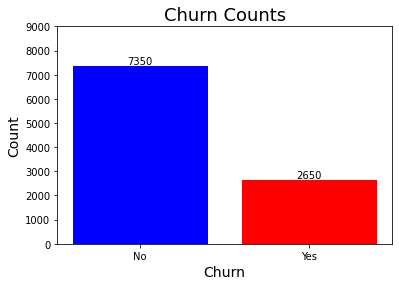

In [5]:
#Customer's churn in last month

groups = df.Churn.value_counts().tolist()
counts = df.Churn.unique().tolist()

fig, ax = plt.subplots()
rect = ax.bar(counts, groups, color=['b', 'r'])
ax.set_ylim(0,9000)
ax.set_ylabel('Count', fontsize=14)
ax.set_xlabel('Churn', fontsize=14)
ax.set_title('Churn Counts', fontsize=18)
ax.bar_label(rect)
plt.show()

In [6]:
#Creating a new dataset that only have data related to churned customers
churn_df = df[df['Churn']=='Yes']
churn_df.shape

(2650, 50)

In [7]:
#The features in the dataframe
churn_df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [8]:
#eliminating variables that have no importance in our analysis

column = ['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 
          'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone','Job', 'Churn'
         ]

churn_df = churn_df.drop(columns=column)
churn_df.head()

,Children,Age,Income,Marital,Gender,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Techie,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,27,21704.77,Married,Female,11.699080,12,0,1,Yes,...,242.632554,800.982766,3,4,3,3,4,3,4,4
4,0,83,40074.19,Separated,Male,8.147417,16,2,1,No,...,149.948316,271.493436,4,4,4,3,4,4,4,5
6,0,79,11467.50,Widowed,Male,11.182725,10,0,1,Yes,...,200.118516,1907.242972,6,5,6,4,1,5,5,5
7,2,30,26759.64,Married,Female,7.791632,16,0,0,Yes,...,114.950905,979.612708,2,2,2,5,2,3,4,5
14,1,30,64256.81,Separated,Male,11.790730,10,3,0,No,...,159.965581,1582.295235,3,3,4,2,3,4,4,2


In [9]:
#List of remaining features
churn_df.columns

Index(['Children', 'Age', 'Income', 'Marital', 'Gender', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

### 2.1. Univariate Visualization

In [10]:
#Creating two lists, containing continuous and categorical variables

cont_var = ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
            'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6',
            'Item7', 'Item8'
           ]
cat_var = [i for i in churn_df.columns if i not in cont_var]

print('Continuous variables are:\n\n {} \n\n and Categorical variables are:\n\n {}'.format(cont_var, cat_var))

Continuous variables are:

 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'] 

 and Categorical variables are:

 ['Marital', 'Gender', 'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']


### 2.1.1. Continuous Variables

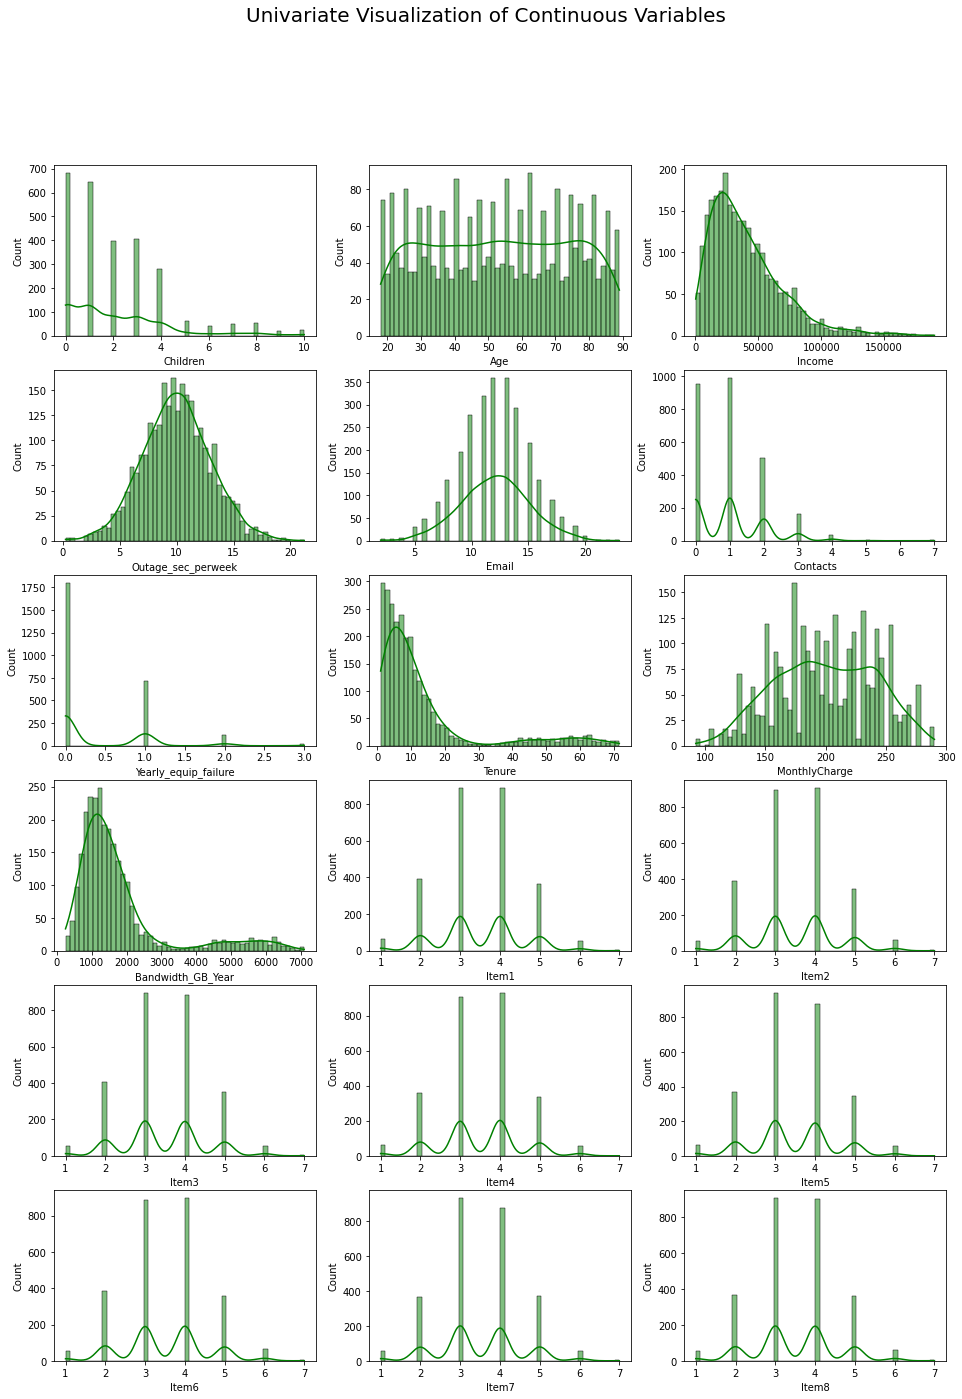

In [11]:
#Visualizing continuous variables

list1 = np.array(cont_var).reshape(6,3)

fig, axes = plt.subplots(6, 3, figsize=(16,22))
fig.suptitle('Univariate Visualization of Continuous Variables', fontsize=20)
for index, var in np.ndenumerate(list1):
    sns.histplot(ax=axes[index[0], index[1]], data=churn_df, x=var, kde=True, color='green', bins='sqrt')
    plt.xlabel(var)
    plt.ylabel('Count')
plt.savefig('fig.jpg')
plt.show()

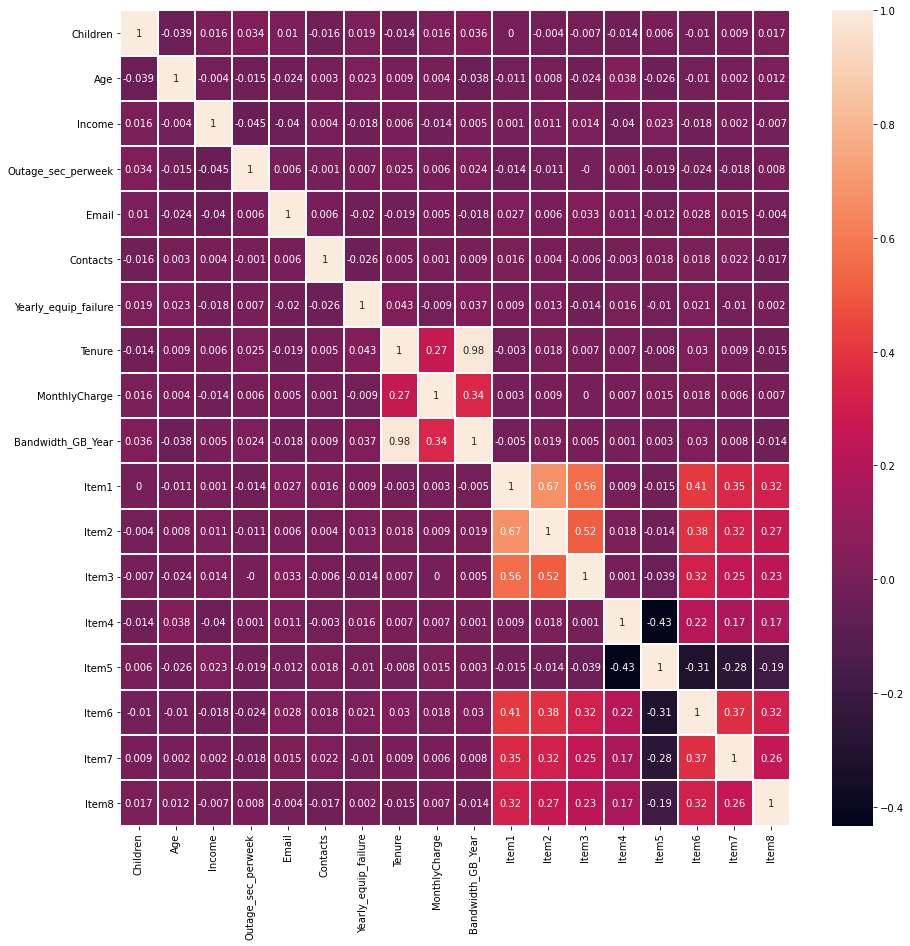

In [12]:
#Correlation Matirx of the continuous variables

corr_mat = round(churn_df[cont_var].corr(), 3)
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat, annot=True, linewidth=0.01)
plt.savefig('fig.jpg')
plt.show()

### 2.1.2. Categorical Variables

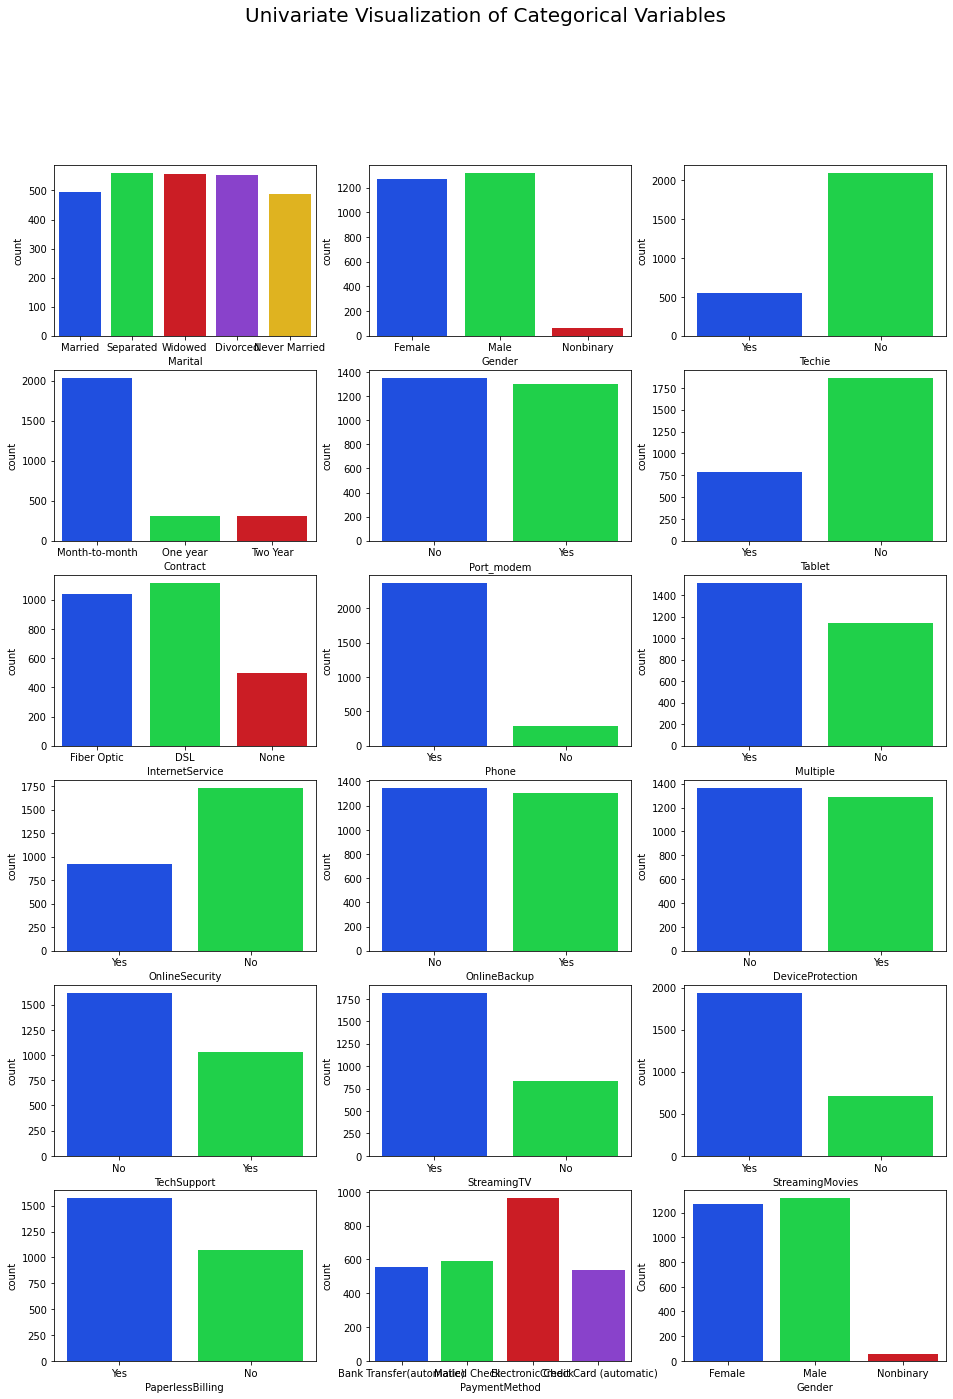

In [13]:
#Visualizing categorical variables

cat_var.append(churn_df.columns[4])             # adding Gender variable to the 
                                                #categorical variables for easier plotting

list2 = np.array(cat_var, dtype='object').reshape(6,3)

fig, axes = plt.subplots(6, 3, figsize=(16,22))
fig.suptitle('Univariate Visualization of Categorical Variables', fontsize=20)
for index, var in np.ndenumerate(list2):
    sns.countplot(ax=axes[index[0], index[1]], data=churn_df, x=var)
    plt.xlabel(var)
    plt.ylabel('Count')
    
plt.savefig('fig.jpg')
plt.show()

### 2.2. Bivariate Visualization

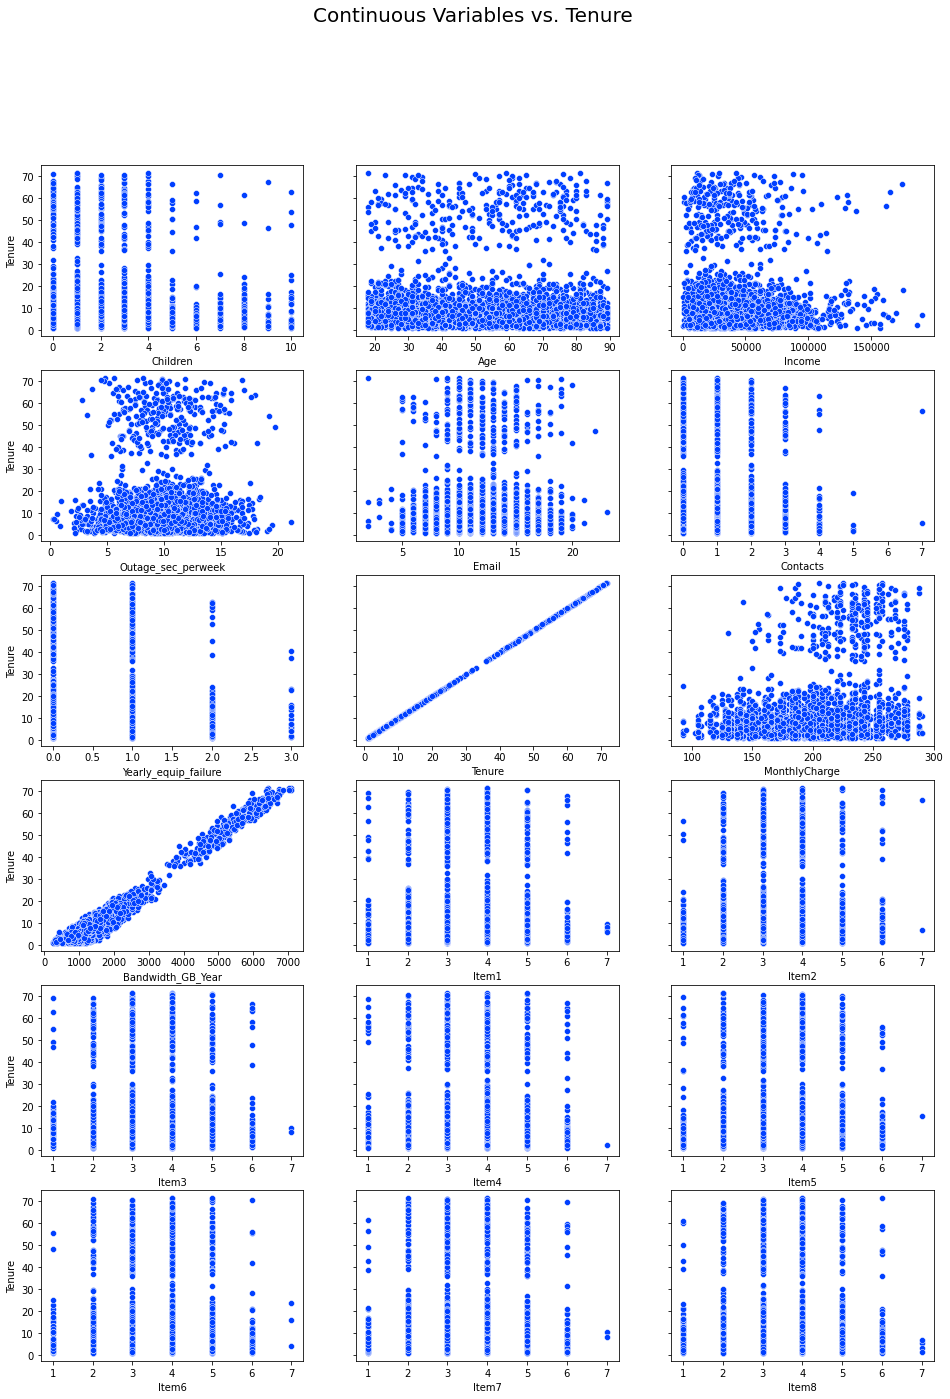

In [14]:
# Continuous Variables VS. Tenure


list1 = np.array(cont_var).reshape(6,3)

fig, axes = plt.subplots(6, 3, sharey=True, figsize=(16,22))
fig.suptitle('Continuous Variables vs. Tenure', fontsize=20)
for index, var in np.ndenumerate(list1):
    sns.scatterplot(ax=axes[index[0], index[1]], data=churn_df, x=var, y='Tenure')
    plt.xlabel(var)
    
plt.savefig('fig.jpg')
plt.show()

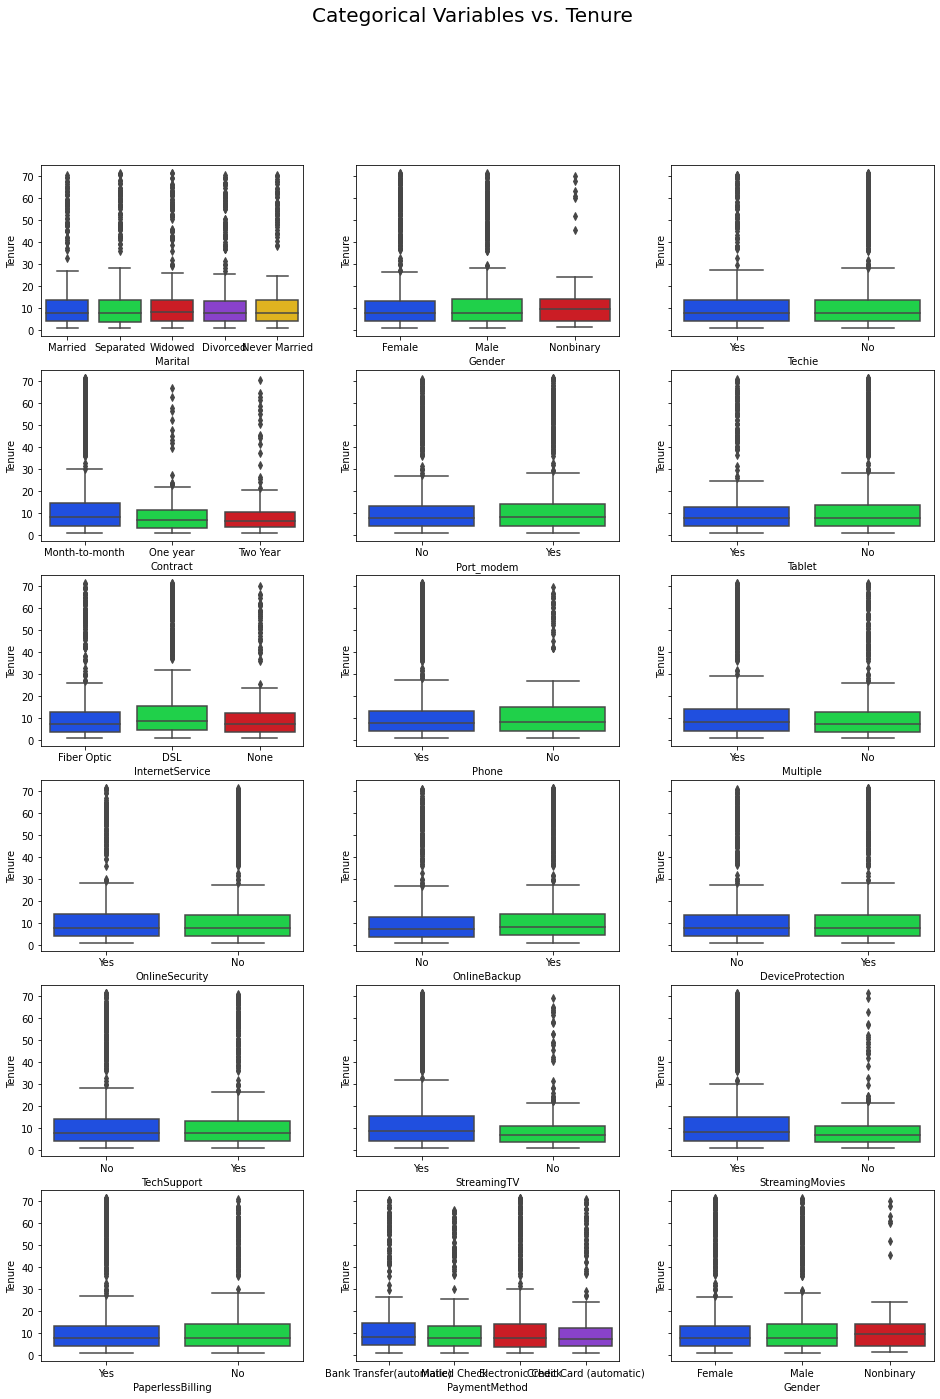

In [15]:
# Categorical Variables VS. Tenure


list2 = np.array(cat_var, dtype='object').reshape(6,3)

fig, axes = plt.subplots(6, 3, sharey=True, figsize=(16,22))
fig.suptitle('Categorical Variables vs. Tenure', fontsize=20)
for index, var in np.ndenumerate(list2):
    sns.boxplot(ax=axes[index[0], index[1]], data=churn_df, x=var, y='Tenure')
    plt.xlabel(var)
    plt.ylabel('Tenure')
    
plt.savefig('fig.jpg')
plt.show()

## 3. Data Wrangling

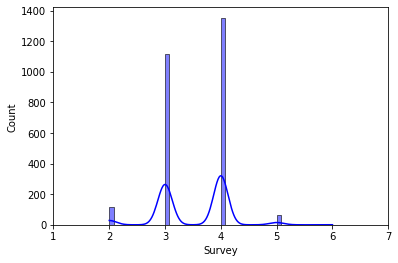

In [16]:
# Creating a new feature by averaging all the 8 questions in survey:

surv = ['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
churn_df['Survey'] = churn_df[surv].astype(float).mean(axis=1).round()
churn_df = churn_df.drop(columns=surv)

#Graphing the new feature

sns.histplot(data=churn_df, x='Survey', kde=True, color='blue', bins='sqrt')
plt.xticks(range(1,8,1))
plt.show()

In [17]:
#droping one variable due to Multicollinearity and creating the cleaned dataset

cleaned_df = churn_df.drop(columns=['Bandwidth_GB_Year'])
cleaned_df.shape

(2650, 27)

In [18]:
# creating dummy variables for all categorical features 

cleaned_df = pd.get_dummies(cleaned_df, drop_first=True)
cleaned_df.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Survey,...,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Credit Card (automatic),PaymentMethod_Electronic Check,PaymentMethod_Mailed Check
1,1,27,21704.77,11.699080,12,0,1,1.156681,242.632554,4.0,...,1,0,0,0,1,1,1,0,0,0
4,0,83,40074.19,8.147417,16,2,1,1.670972,149.948316,4.0,...,0,0,0,1,1,0,0,0,0,1
6,0,79,11467.50,11.182725,10,0,1,13.236774,200.118516,5.0,...,0,0,0,1,1,1,0,0,1,0
7,2,30,26759.64,7.791632,16,0,0,4.264255,114.950905,3.0,...,0,1,0,0,0,0,1,0,0,1
14,1,30,64256.81,11.790730,10,3,0,10.060199,159.965581,3.0,...,0,1,0,1,0,0,1,0,0,0


In [19]:
# Saving the cleaned dataset into a csv file.

cleaned_df.to_csv('cleaned_dataset.csv', index=False)

In [20]:
#seaparating independent and dependent variables

X = cleaned_df.drop(columns='Tenure')
y = cleaned_df[['Tenure']]
X.shape

(2650, 34)

## 4. Creating the Initial Model

In [21]:
#Spliting observations into training, validation and test groups:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=110)


print('Training Set Observations: %.f' % X_train.shape[0]) 
print('Test Set Observations: %.f' % X_test.shape[0]) 

Training Set Observations: 1855
Test Set Observations: 795


In [22]:
# Normalizing the features

from sklearn.preprocessing import MinMaxScaler

index_train = X_train.index
index_test = X_test.index


n_scaler = MinMaxScaler()
X_train = pd.DataFrame(n_scaler.fit_transform(X_train), index=index_train, columns=X.columns)
X_test = pd.DataFrame(n_scaler.transform(X_test), index=index_test, columns=X.columns)


In [23]:
#Creating the initial model

init_mod = sm.OLS(y_train, sm.add_constant(X_train)).fit()
init_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     11.02
Date:                Sat, 22 May 2021   Prob (F-statistic):           6.84e-53
Time:                        13:13:17   Log-Likelihood:                -7566.9
No. Observations:                1855   AIC:                         1.520e+04
Df Residuals:                    1820   BIC:                         1.540e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     5.2630      2.969      1.773      0.076      -0.559      11.085
Children                                  1.1788      1.638      0.720      0.472      -2.033       4.391
Age                                      -0.8944      1.170     -0.765      0.445      -3.188       1.400
Income                                   -0.4387      2.228     -0.197      0.844      -4.807       3.930
Outage_sec_perweek                        2.2986      2.383      0.964      0.335      -2.376       6.973
Email                                    -1.9667      2.231     -0.881      0.378      -6.343       2.409
Contacts                                 -0.1472      2.396     -0.061      0.951      -4.846       4.551
Yearly_equip_failure                      2.6145      1.657      1.577      0.115      -0.636       5.865
MonthlyCharge                            32.8087      9.572      3.428      0.001      14.036      51.581
Survey                                    0.4955      2.174      0.228      0.820      -3.768       4.759
Marital_Married                           0.2435      1.057      0.230      0.818      -1.830       2.317
Marital_Never Married                     0.7568      1.082      0.699      0.484      -1.366       2.879
Marital_Separated                         0.3544      1.046      0.339      0.735      -1.698       2.407
Marital_Widowed                           0.0002      1.044      0.000      1.000      -2.046       2.047
Gender_Male                               0.1726      0.684      0.252      0.801      -1.169       1.514
Gender_Nonbinary                          0.8223      2.326      0.353      0.724      -3.740       5.385
Techie_Yes                                1.7143      0.826      2.075      0.038       0.094       3.335
Contract_One year                        -9.4543      1.111     -8.509      0.000     -11.633      -7.275
Contract_Two Year                        -8.3845      1.093     -7.668      0.000     -10.529      -6.240
Port_modem_Yes                            0.5970      0.675      0.884      0.377      -0.728       1.922
Tablet_Yes                               -1.0412      0.736     -1.414      0.157      -2.485       0.403
InternetService_Fiber Optic              -8.3227      1.201     -6.932      0.000     -10.678      -5.968
InternetService_None                     -3.1812      1.155     -2.755      0.006      -5.446      -0.916
Phone_Yes                                -1.0832      1.075     -1.008      0.314      -3.191       1.025
Multiple_Yes                             -1.8868      1.733     -1.089      0.276      -5.286       1.512
OnlineSecurity_Yes                       -0.2582      0.713     -0.362      0.717      -1.656       1.140
OnlineBac

## 5. Feature Selection and Creating Reduced Model


In [24]:
#Defining a function for Stepwise Feature Selection

def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype='float64')
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [25]:
#Selected Features

features =stepwise_selection(X_train, y_train)
features

['MonthlyCharge',
 'InternetService_Fiber Optic',
 'Contract_One year',
 'Contract_Two Year',
 'InternetService_None',
 'StreamingTV_Yes',
 'TechSupport_Yes',
 'Techie_Yes']

In [26]:
#Creating the reduced model with the selected features

r_X_train = X_train[features]
r_X_test = X_test[features]

re_model = sm.OLS(y_train, sm.add_constant(r_X_train)).fit()
re_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Tenure   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     44.96
Date:                Sat, 22 May 2021   Prob (F-statistic):           2.54e-66
Time:                        13:17:21   Log-Likelihood:                -7575.5
No. Observations:                1855   AIC:                         1.517e+04
Df Residuals:                    1846   BIC:                         1.522e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           3.2648      1.042      3.134      0.002       1.222       5.308
MonthlyCharge                  26.7875      2.085     12.849      0.000      22.699      30.876
InternetService_Fiber Optic    -7.7356      0.776     -9.965      0.000      -9.258      -6.213
Contract_One year              -9.4238      1.101     -8.562      0.000     -11.582      -7.265
Contract_Two Year              -8.1505      1.081     -7.542      0.000     -10.270      -6.031
InternetService_None           -3.6348      0.948     -3.834      0.000      -5.494      -1.776
StreamingTV_Yes                 2.1265      0.857      2.482      0.013       0.446       3.807
TechSupport_Yes                -1.5448      0.694     -2.226      0.026      -2.906      -0.184
Techie_Yes                      1.6578      0.818      2.028      0.043       0.054       3.261
==============================================================================
Omnibus:                      565.123   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1425.639
Skew:                           1.649   Prob(JB):                    2.67e-310
Kurtosis:                       5.751   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

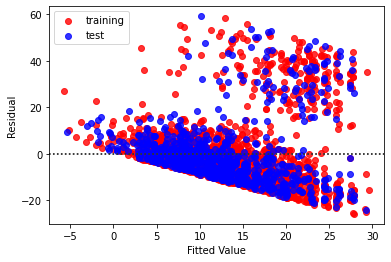

In [27]:
#Residual plot

y_pred = re_model.predict(sm.add_constant(r_X_train))
resid = y_train.values.reshape(1855,) - y_pred

y_pred_test = re_model.predict(sm.add_constant(r_X_test))
resid_test = y_test.values.reshape(795,) - y_pred_test

plt.figure()
sns.residplot(x=y_pred, y=resid, color='r', label='training')
sns.residplot(x=y_pred_test, y=resid_test, color='b', label='test')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.legend()
plt.savefig('fig.jpg')
plt.show()

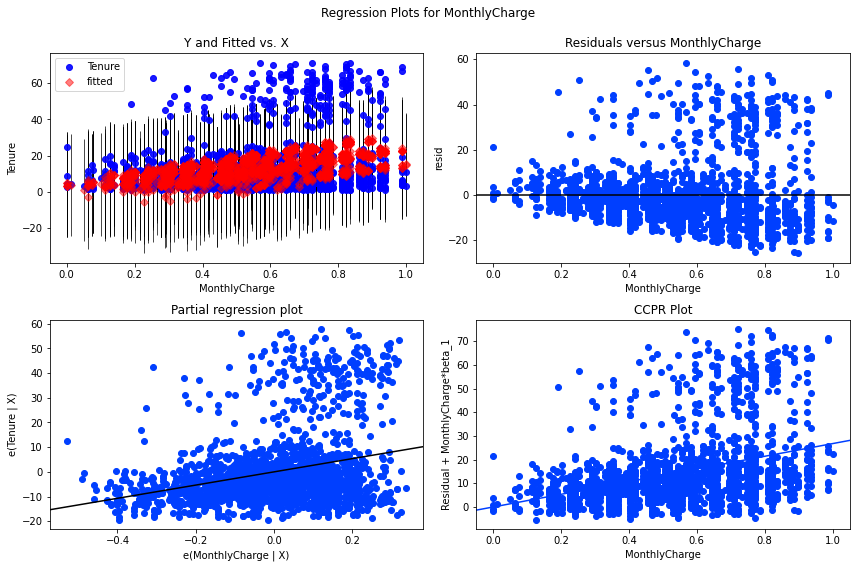

In [28]:
#Residual plot with the only continuous predictor on X axis

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(re_model, 'MonthlyCharge' ,fig=fig)

In [29]:
#Printing R2 of the reduced model

from sklearn.metrics import r2_score

print('R2 for the training set is %.3f' % r2_score(y_train, y_pred))
print('R2 for the test set is %.3f' % r2_score(y_test, y_pred_test))

R2 for the training set is 0.163
R2 for the test set is 0.173


In [30]:
#Residual Sum of Squares

print('Residual Sum of Squares is %.2f' % re_model.ssr)

Residual Sum of Squares is 382839.62


In [31]:
# Regression Equation

coef = round(re_model.params, 2)
coef

print('The regression equation is: \n\n \
      Tenure = {} + {} {} + {} {} + \n {} {} + {} {} + {} {} +\n {} {} +{} {} + {} {}'.format(coef[0],
                                                                                coef[1], features[0],
                                                                                coef[2], features[1],
                                                                                coef[3], features[2],
                                                                                coef[4], features[3],
                                                                                coef[5], features[4],
                                                                                coef[6], features[5],
                                                                                coef[7], features[6],
                                                                                coef[8], features[7],))

The regression equation is: 

       Tenure = 3.26 + 26.79 MonthlyCharge + -7.74 InternetService_Fiber Optic + 
 -9.42 Contract_One year + -8.15 Contract_Two Year + -3.63 InternetService_None +
 2.13 StreamingTV_Yes +-1.54 TechSupport_Yes + 1.66 Techie_Yes
